# Using python's cartopy package to georeference EASE-Grid 2.0 cube data

This notebook demonstrates the following typical tasks you might want to do with CETB EASE-Grid 2.0 cube data:

<ol>
    <li> Display a couple of time steps of a cube on the same plot</li>
    <li> Use the mouse to get the coordinates and values of the data in the subplots </li>
</ol>

You will need to be working in a python environment with the following packages installed.  I think the cartopy features here require it to be a python 3 environment:

<code>
    cartopy
    matplotlib
    netCDF4
</code>


In [1]:
%matplotlib notebook
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np

In [2]:
geod = ccrs.Geodetic()
e2n = ccrs.LambertAzimuthalEqualArea(central_latitude=90.0)

# Read in a CETB cube file and use it to get the projected extent

In [3]:
file = "/Users/brodzik/cetb_data/v1.3/F16_SSMIS/N/cubes_WesternUS/CETB.cubefile.WesternUS.F16_SSMIS-19H-SIR-CSU-v1.3.2005.TB.nc"
f = Dataset(file, 'r', 'netCDF4')

In [4]:
x = f.variables['x'][:]
y = f.variables['y'][:]

In [5]:
# Define extent in projected coordinates.
# Use the x, y coordinate variables in the file, which give the centers of the pixels, 
# and adjust these by 1/2 pixel to get the corners of the corner pixels
# We want extent as [x_min, x_max, y_min, y_max]
extent = [x[0], x[-1], y[-1], y[0]]
extent

[-6071875.0, -3553125.0, 1028125.0, 3071875.0]

In [6]:
x_res_m = np.fabs(x[1] - x[0])
y_res_m = np.fabs(y[1] - y[0])

In [7]:
x_res_m, y_res_m

(6250.0, 6250.0)

In [8]:
extent = [x[0] - (x_res_m / 2.), x[-1] + (x_res_m / 2.), 
          y[-1] - (y_res_m / 2.), y[0] + (y_res_m / 2.)]
extent

[-6075000.0, -3550000.0, 1025000.0, 3075000.0]

In [9]:
tb = f.variables['TB'][:]
tb.shape

(730, 328, 404)

In [10]:
f.close()

In [11]:
for t in np.arange(730):
    print(t, np.min(tb[t,:,:]), np.max(tb[t,:,:]))

0 -- --
1 -- --
2 -- --
3 -- --
4 -- --
5 -- --
6 -- --
7 -- --
8 -- --
9 -- --
10 -- --
11 -- --
12 -- --
13 -- --
14 -- --
15 -- --
16 -- --
17 -- --
18 -- --
19 -- --
20 -- --
21 -- --
22 -- --
23 -- --
24 -- --
25 -- --
26 -- --
27 -- --
28 -- --
29 -- --
30 -- --
31 -- --
32 -- --
33 -- --
34 -- --
35 -- --
36 -- --
37 -- --
38 -- --
39 -- --
40 -- --
41 -- --
42 -- --
43 -- --
44 -- --
45 -- --
46 -- --
47 -- --
48 -- --
49 -- --
50 -- --
51 -- --
52 -- --
53 -- --
54 -- --
55 -- --
56 -- --
57 -- --
58 -- --
59 -- --
60 -- --
61 -- --
62 -- --
63 -- --
64 -- --
65 -- --
66 -- --
67 -- --
68 -- --
69 -- --
70 -- --
71 -- --
72 -- --
73 -- --
74 -- --
75 -- --
76 -- --
77 -- --
78 -- --
79 -- --
80 -- --
81 -- --
82 -- --
83 -- --
84 -- --
85 -- --
86 -- --
87 -- --
88 -- --
89 -- --
90 -- --
91 -- --
92 -- --
93 -- --
94 -- --
95 -- --
96 -- --
97 -- --
98 -- --
99 -- --
100 -- --
101 -- --
102 -- --
103 -- --
104 -- --
105 -- --
106 -- --
107 -- --
108 -- --
109 -- --
110 -- --


# Note that mouse functions work for pan/zoom on either subplot

<IPython.core.display.Javascript object>


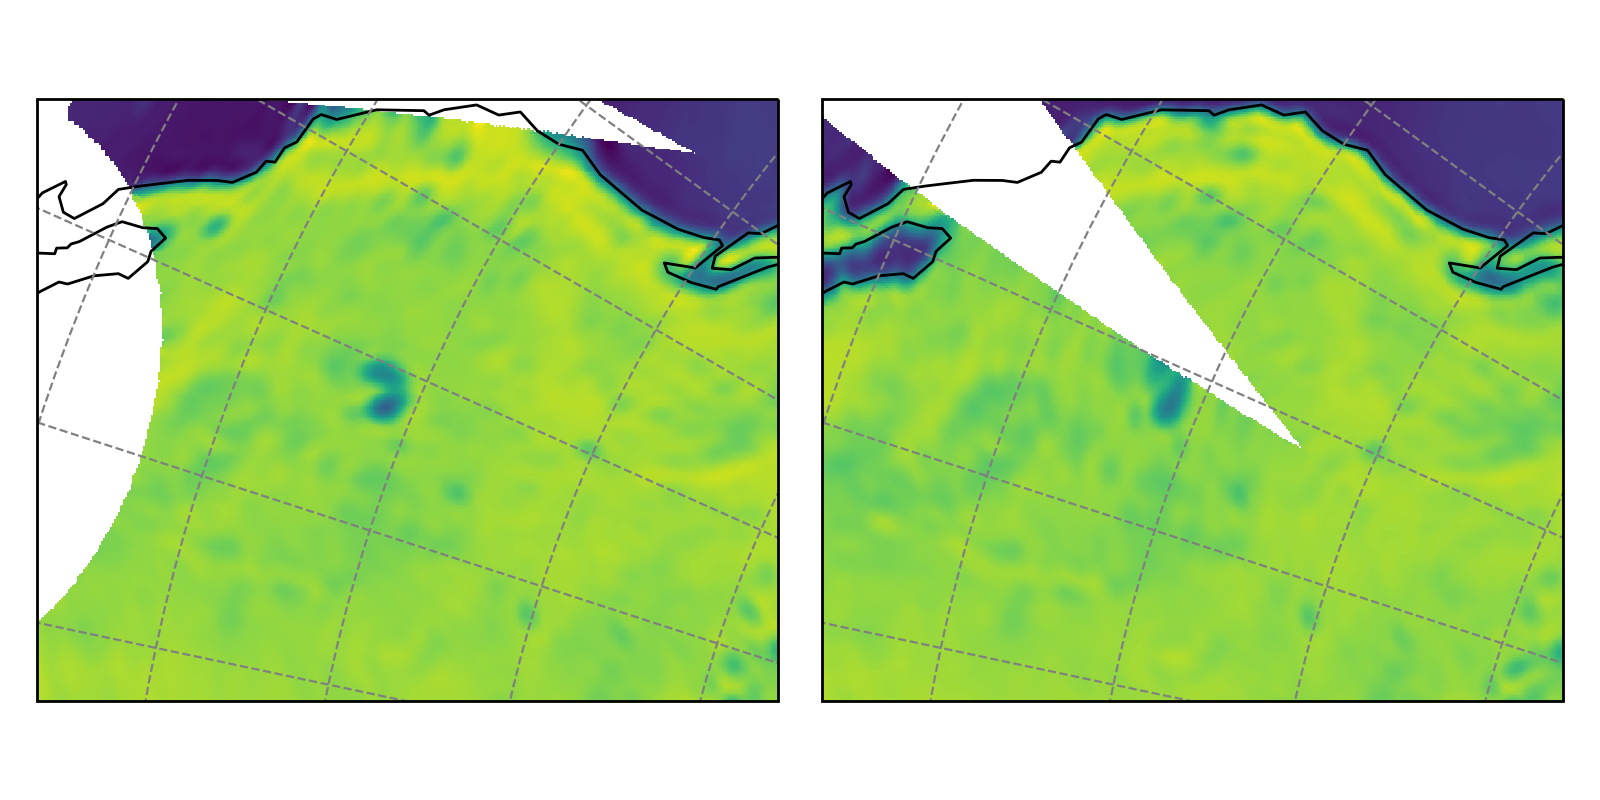

In [12]:
fig = plt.figure(figsize=(8,4))

axes = fig.subplots(1, 2, subplot_kw=dict(projection=e2n))

for ax in axes:
    ax.set_extent(extent, crs=e2n)
    
axes[0].imshow(tb[645,:,:], extent=extent, transform=e2n, origin='upper')
axes[1].imshow(tb[646,:,:], extent=extent, transform=e2n, origin='upper')

for ax in axes:
    ax.gridlines(color='gray', linestyle='--')
    ax.coastlines()

fig.tight_layout()
